<a href="https://colab.research.google.com/github/Emyfoton/MetodosI_EmilyCastillo_SebastianRodriguez/blob/main/Tarea_Interpolaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicios derivación punto 8:

In [21]:
#Parte c)

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

x=np.array([0.1, 0.6, 1.1])


def f_1(x):
  return np.sqrt(np.tan(x))

y=np.array(f_1(x))
X=sym.Symbol('x', real=True)

def Bases_cardinales(x,X,i):
  base=1
  for j in range(len(x)):
    if j!=i:
      base *= ((X-x[j])/(x[i]-x[j]))
  return base

def Poly_Interpolacion(x,y,X):
  poly=0
  for i in range(len(x)):
    poly += y[i]*Bases_cardinales(x,X,i)
  return poly


def obtener_coeficientes(x):
  C=np.zeros(len(x))
  for i in range(len(x)):
    C[i]=sym.diff(Bases_cardinales(x,X,i)).subs(X,0)

  return C
c= obtener_coeficientes(x)
print(c)

[-3.4  4.8 -1.4]


Ecuación de la derivada Progresiva: (-17f(x+0.1h)+24f(x+0.6h)-7f(x+1.1h))/5h

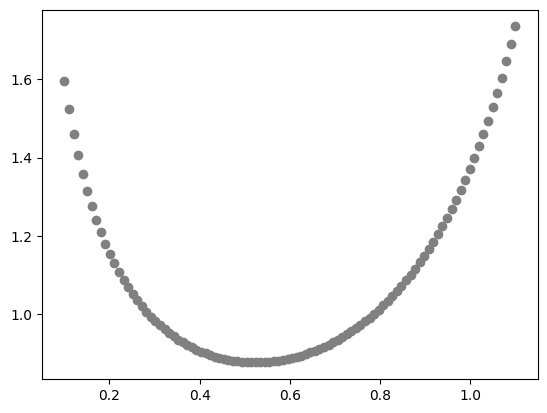

In [40]:
# Parte d) Derivada central

x2=np.linspace(0.1, 1.1, 100)

def central(f,x,h=0.01):
  return (f(x+h)-f(x-h))/(2*h)

y=central(f_1,x2)

plt.scatter(x2, y, color= "grey")
plt.show()

In [41]:
#Parte e)



#Derivada progresiva
def progresiva (x, h= 0.001):
  return (-17*f_1(x+0.1*h)+24*f_1(x+0.6*h)-7*f_1(x+1.1*h))/5*h

yp= progresiva(x2)

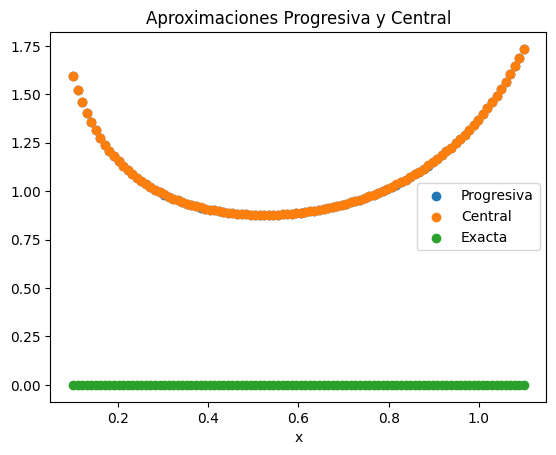

'la progresiva y central son la misma, por lo que al imprimirlas se superponen y solo se ve una de ellas'

In [44]:
#Derivada exacta

import numpy as np
import matplotlib.pyplot as plt

def exacta (x):
  return ((1/(np.cos(x))**2)/(2*np.sqrt(np.tan(x))))


y2=exacta(x2)
plt.scatter(x2, y2, label='Progresiva')
plt.scatter(x2, y, label='Central')
plt.scatter(x2,yp, label='Exacta')
plt.xlabel('x')
plt.legend()
plt.title('Aproximaciones Progresiva y Central')
plt.show()


"""la progresiva y central son la misma, por lo que al imprimirlas se superponen y solo se ve una de ellas"""

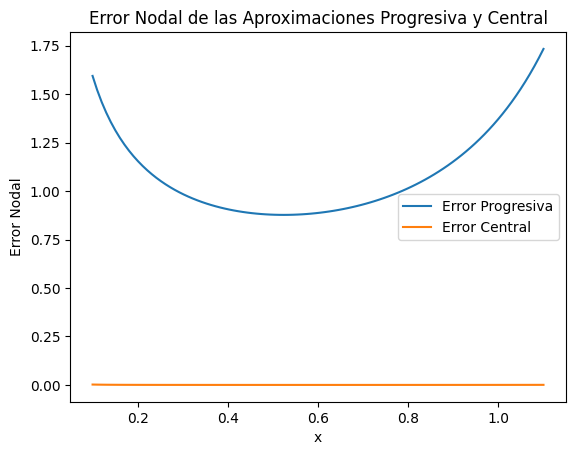

In [45]:
#Parte f) error nodal

def error_progresiva (x):
  return np.abs(exacta(x) - progresiva(x))

def error_central(x):
    return np.abs(exacta(x) - central(f_1, x))

plt.plot(x2, error_progresiva(x2), label='Error Progresiva')
plt.plot(x2, error_central(x2), label='Error Central')
plt.xlabel('x')
plt.ylabel('Error Nodal')
plt.legend()
plt.title('Error Nodal de las Aproximaciones Progresiva y Central')
plt.show()

Ejercicios interpolación:

El error es: 1.189e-03


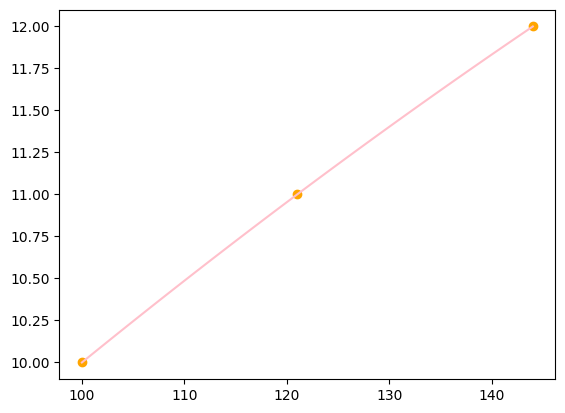

In [46]:
#Punto 3)
"""¿Con que grado de exactitud podemos calcular √114 mediante la interpolacion de Lagrange para la funcion f(x) = √x
si elegimos los puntos x0 = 100, x1 = 121, x2 = 144. Rta: |E| ≃ (1.8×10−3) """

import numpy as np
import matplotlib.pyplot as plt

def f_2(x):
    return np.sqrt(x)

def exactitud (poly_interpolacion, funcion, punto):
  return float(funcion(punto))-float(poly_interpolacion)

x=np.array([100, 121, 144])
y=np.array(np.sqrt(x))

valor_poly= Poly_Interpolacion(x,y, 114)
error= exactitud(valor_poly, f_2, 114)
nc= "{:.3e}".format(error)
print(f"El error es: {nc}")

xd=np.linspace(x[0],x[-1],50)
yd= Poly_Interpolacion(x, y, xd)
plt.plot(xd,yd, color= "pink")
plt.scatter(x,y, color= "orange")
plt.show()

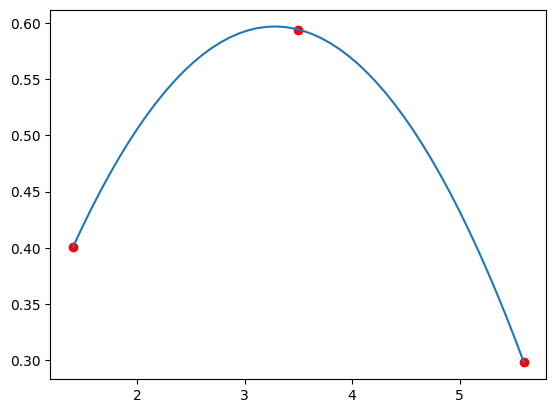

In [7]:
# Punto 4) Bala
x_b = np.array([1.4, 3.5, 5.6])
y_b = np.array([0.4007954931819738 ,0.594128102489774 ,0.29802795523938164])

X= sym.Symbol('x', real=True)

x_p=np.linspace(x_b[0], x_b[-1], 50)
y_p=Poly_Interpolacion(x_b,y_b,x_p)
plt.plot(x_p,y_p)
plt.scatter(x_b,y_b, color="r")
plt.show()

In [48]:
X_max = 0.363970234266202/(2*0.0554912422401579)
g=9.8
Vy=np.sqrt(2*(g)*(np.max(y_b)))
Ti=Vy/g
Vx=(X_max)/Ti
Theta=np.arctan(Vy/Vx)

In [49]:
Vo=round(np.sqrt((Vy**2)+(Vx**2)))
Vo

10

In [50]:
Grados=round(Theta*180/np.pi)
Grados

20